In [3]:
2+2



4

In [4]:
9 +0 

9

In [5]:
#!pip install pandas

In [6]:
import pandas as pd

In [7]:
#!pip install seaborn

In [8]:
import seaborn as sns

In [9]:
# %pip install -U scikit-learn

In [41]:
from sklearn.linear_model import LinearRegression


In [48]:
from sklearn.metrics import mean_squared_error

In [10]:
df = pd.read_parquet('/Users/aditisingh/Downloads/MLOPS_Project/green_tripdata_2022-10.parquet')

In [11]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-10-01 00:38:35,2022-10-01 00:51:03,N,1.0,256,225,1.0,2.47,11.5,0.5,0.5,2.56,0.0,None,0.3,15.36,1.0,1.0,0.00
1,2,2022-10-01 01:06:08,2022-10-01 01:12:33,N,1.0,166,152,1.0,1.96,7.5,0.5,0.5,2.20,0.0,None,0.3,11.00,1.0,1.0,0.00
2,2,2022-10-01 00:31:40,2022-10-01 00:45:15,N,1.0,74,262,1.0,2.43,11.5,0.5,0.5,2.00,0.0,None,0.3,17.55,1.0,1.0,2.75
3,2,2022-10-01 00:51:12,2022-10-01 00:58:42,N,1.0,74,42,1.0,2.25,8.5,0.5,0.5,1.96,0.0,None,0.3,11.76,1.0,1.0,0.00
4,1,2022-10-01 00:42:58,2022-10-01 00:54:33,N,1.0,74,247,1.0,0.00,17.2,0.0,0.5,0.00,0.0,None,0.3,18.00,1.0,1.0,0.00


In [12]:
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)

In [13]:
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)

In [14]:
df['duration'] =  df.lpep_dropoff_datetime - df.lpep_pickup_datetime 

In [15]:
df['duration']

0       0 days 00:12:28
1       0 days 00:06:25
2       0 days 00:13:35
3       0 days 00:07:30
4       0 days 00:11:35
              ...      
69317   0 days 00:26:00
69318   0 days 00:21:00
69319   0 days 00:11:00
69320   0 days 00:11:00
69321   0 days 00:06:00
Name: duration, Length: 69322, dtype: timedelta64[us]

In [16]:
df1 = df[0:100]

In [17]:
df1.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2022-10-01 00:38:35,2022-10-01 00:51:03,N,1.0,256,225,1.0,2.47,11.5,...,0.5,2.56,0.0,None,0.3,15.36,1.0,1.0,0.00,0 days 00:12:28
1,2,2022-10-01 01:06:08,2022-10-01 01:12:33,N,1.0,166,152,1.0,1.96,7.5,...,0.5,2.20,0.0,None,0.3,11.00,1.0,1.0,0.00,0 days 00:06:25
2,2,2022-10-01 00:31:40,2022-10-01 00:45:15,N,1.0,74,262,1.0,2.43,11.5,...,0.5,2.00,0.0,None,0.3,17.55,1.0,1.0,2.75,0 days 00:13:35
3,2,2022-10-01 00:51:12,2022-10-01 00:58:42,N,1.0,74,42,1.0,2.25,8.5,...,0.5,1.96,0.0,None,0.3,11.76,1.0,1.0,0.00,0 days 00:07:30
4,1,2022-10-01 00:42:58,2022-10-01 00:54:33,N,1.0,74,247,1.0,0.00,17.2,...,0.5,0.00,0.0,None,0.3,18.00,1.0,1.0,0.00,0 days 00:11:35


In [18]:
#df1.duration.describe()

In [19]:
df1['duration']

0    0 days 00:12:28
1    0 days 00:06:25
2    0 days 00:13:35
3    0 days 00:07:30
4    0 days 00:11:35
           ...      
95   0 days 00:21:37
96   0 days 00:09:40
97   0 days 00:17:55
98   0 days 00:10:46
99   0 days 00:20:49
Name: duration, Length: 100, dtype: timedelta64[us]

In [20]:
df.duration = df.duration.apply(lambda td: td.total_seconds() /60)

In [21]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2022-10-01 00:38:35,2022-10-01 00:51:03,N,1.0,256,225,1.0,2.47,11.50,...,0.5,2.56,0.0,None,0.3,15.36,1.0,1.0,0.00,12.466667
1,2,2022-10-01 01:06:08,2022-10-01 01:12:33,N,1.0,166,152,1.0,1.96,7.50,...,0.5,2.20,0.0,None,0.3,11.00,1.0,1.0,0.00,6.416667
2,2,2022-10-01 00:31:40,2022-10-01 00:45:15,N,1.0,74,262,1.0,2.43,11.50,...,0.5,2.00,0.0,None,0.3,17.55,1.0,1.0,2.75,13.583333
3,2,2022-10-01 00:51:12,2022-10-01 00:58:42,N,1.0,74,42,1.0,2.25,8.50,...,0.5,1.96,0.0,None,0.3,11.76,1.0,1.0,0.00,7.500000
4,1,2022-10-01 00:42:58,2022-10-01 00:54:33,N,1.0,74,247,1.0,0.00,17.20,...,0.5,0.00,0.0,None,0.3,18.00,1.0,1.0,0.00,11.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69317,2,2022-10-31 23:35:00,2022-11-01 00:01:00,None,NaN,198,61,NaN,4.05,21.61,...,0.0,5.00,0.0,None,0.3,26.91,NaN,NaN,NaN,26.000000
69318,2,2022-10-31 23:29:00,2022-10-31 23:50:00,None,NaN,66,225,NaN,4.15,17.38,...,0.0,0.00,0.0,None,0.3,17.68,NaN,NaN,NaN,21.000000
69319,2,2022-10-31 23:51:00,2022-11-01 00:02:00,None,NaN,61,61,NaN,2.25,10.34,...,0.0,0.62,0.0,None,0.3,11.26,NaN,NaN,NaN,11.000000
69320,2,2022-10-31 23:11:00,2022-10-31 23:22:00,None,NaN,80,225,NaN,2.08,10.84,...,0.0,0.00,0.0,None,0.3,11.14,NaN,NaN,NaN,11.000000


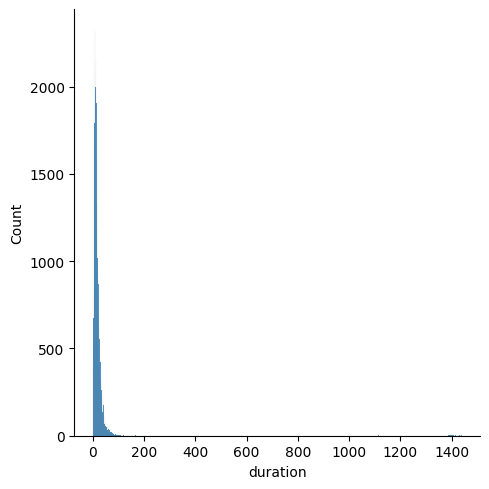

In [22]:
sns.displot(df.duration)

In [23]:
df.duration.describe(percentiles = [0.95 , 0.98 , 0.99])

count    69322.000000
mean        20.757150
std         77.402223
min          0.000000
50%         12.783333
95%         41.950000
98%         59.369333
99%         77.739500
max       1438.783333
Name: duration, dtype: float64

In [24]:
df[(df.duration >= 1) & (df.duration <= 60)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2022-10-01 00:38:35,2022-10-01 00:51:03,N,1.0,256,225,1.0,2.47,11.50,...,0.5,2.56,0.0,None,0.3,15.36,1.0,1.0,0.00,12.466667
1,2,2022-10-01 01:06:08,2022-10-01 01:12:33,N,1.0,166,152,1.0,1.96,7.50,...,0.5,2.20,0.0,None,0.3,11.00,1.0,1.0,0.00,6.416667
2,2,2022-10-01 00:31:40,2022-10-01 00:45:15,N,1.0,74,262,1.0,2.43,11.50,...,0.5,2.00,0.0,None,0.3,17.55,1.0,1.0,2.75,13.583333
3,2,2022-10-01 00:51:12,2022-10-01 00:58:42,N,1.0,74,42,1.0,2.25,8.50,...,0.5,1.96,0.0,None,0.3,11.76,1.0,1.0,0.00,7.500000
4,1,2022-10-01 00:42:58,2022-10-01 00:54:33,N,1.0,74,247,1.0,0.00,17.20,...,0.5,0.00,0.0,None,0.3,18.00,1.0,1.0,0.00,11.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69317,2,2022-10-31 23:35:00,2022-11-01 00:01:00,None,NaN,198,61,NaN,4.05,21.61,...,0.0,5.00,0.0,None,0.3,26.91,NaN,NaN,NaN,26.000000
69318,2,2022-10-31 23:29:00,2022-10-31 23:50:00,None,NaN,66,225,NaN,4.15,17.38,...,0.0,0.00,0.0,None,0.3,17.68,NaN,NaN,NaN,21.000000
69319,2,2022-10-31 23:51:00,2022-11-01 00:02:00,None,NaN,61,61,NaN,2.25,10.34,...,0.0,0.62,0.0,None,0.3,11.26,NaN,NaN,NaN,11.000000
69320,2,2022-10-31 23:11:00,2022-10-31 23:22:00,None,NaN,80,225,NaN,2.08,10.84,...,0.0,0.00,0.0,None,0.3,11.14,NaN,NaN,NaN,11.000000


In [25]:
categorical = [ 'PULocationID' , 'DOLocationID']
numerical = ['trip_distance']

In [26]:
df[categorical] = df[categorical].astype(str) 

In [27]:
df[categorical + numerical]

,PULocationID,DOLocationID,trip_distance
0,256,225,2.47
1,166,152,1.96
2,74,262,2.43
3,74,42,2.25
4,74,247,0.00
...,...,...,...
69317,198,61,4.05
69318,66,225,4.15
69319,61,61,2.25
69320,80,225,2.08


In [34]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [28]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                     object
DOLocationID                     object
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [29]:
from sklearn.feature_extraction import DictVectorizer

In [35]:
dv = DictVectorizer() 

X_train = dv.fit_transform(train_dicts)

In [36]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',
 'DOLocationID=146',

In [37]:
X_train

<69322x478 sparse matrix of type '<class 'numpy.float64'>'
	with 207966 stored elements in Compressed Sparse Row format>

In [38]:
target = 'duration'
y_train = df[target].values

In [39]:
y_train

array([12.46666667,  6.41666667, 13.58333333, ..., 11.        ,
       11.        ,  6.        ])

In [40]:
import LinearRegression

ModuleNotFoundError: No module named 'LinearRegression'

In [43]:
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [44]:
y_pred = lr.predict(X_train)

In [45]:
import matplotlib.pyplot as plt

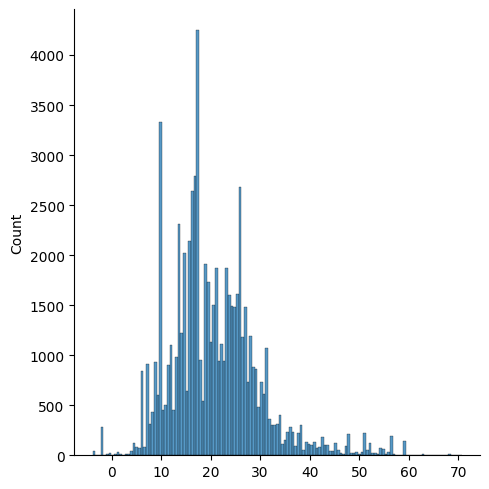

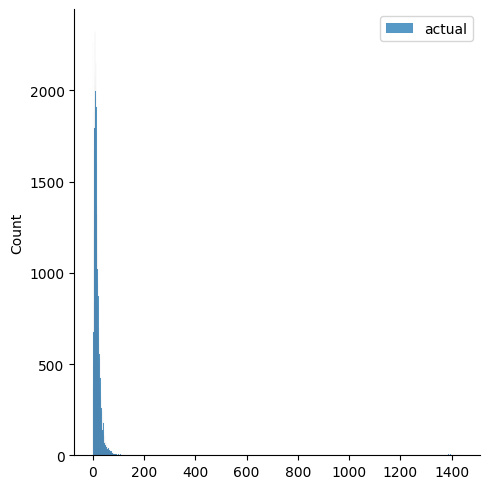

In [46]:
sns.displot(y_pred , label = 'prediction')
sns.displot(y_train , label = 'actual')

plt.legend()

In [49]:
mean_squared_error(y_train , y_pred, squared= False)

/Users/aditisingh/miniconda3/envs/mlops/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


76.85829004588399